In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
df = pd.read_csv("final_data.csv")

In [14]:
df.head(10)

,DATE,CS_INDEX,COST,EMP_TO_POP_RATIO,Per_Capita_GDP,INFLATION,INTEREST_RATES,MONTHLY_SUPPLY,PI,TOTAL_POPULATION,UNEMPLOYMENT_RATE
0,2004-01-01,141.647,150.0,62.3,52179.0,186.3,1.00,3.8,9731.8,292046.0,5.7
1,2004-02-01,143.192,153.4,62.3,0.0,186.7,1.01,3.7,9765.4,292230.0,5.6
2,2004-03-01,145.059,156.5,62.2,0.0,187.1,1.00,3.6,9815.8,292434.0,5.8
3,2004-04-01,146.593,160.1,62.3,52469.0,187.4,1.00,4.0,9865.8,292651.0,5.6
4,2004-05-01,148.187,162.7,62.3,0.0,188.2,1.00,3.8,9950.0,292872.0,5.6
5,2004-06-01,149.852,162.0,62.4,0.0,188.9,1.03,3.9,9988.4,293103.0,5.6
6,2004-07-01,151.340,162.2,62.5,52835.0,189.1,1.26,4.5,10033.0,293350.0,5.5
7,2004-08-01,152.635,165.9,62.4,0.0,189.2,1.43,4.3,10078.2,293603.0,5.4
8,2004-09-01,154.181,167.2,62.3,0.0,189.8,1.61,4.1,10110.5,293857.0,5.4
9,2004-10-01,155.752,165.9,62.3,53242.0,190.8,1.76,3.9,10159.3,294104.0,5.5


In [15]:
X = df.drop(columns=['DATE', 'CS_INDEX'], axis=1)
y = df.CS_INDEX

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
lasso_cv_model = LassoCV(alphas=np.logspace(-4, 4, 100),cv=5)

lasso_cv_model.fit(X_train, y_train)

lasso_cv_predictions = lasso_cv_model.predict(X_test)

optimal_alpha = lasso_cv_model.alpha_

mse = mean_squared_error(y_test, lasso_cv_predictions)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, lasso_cv_predictions)

print(f"Optimal Alpha: {optimal_alpha:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"RMSE: {rmse:2f}")
print(f"R-squared (R2): {r2:.2f}")

Optimal Alpha: 0.1177
Mean Squared Error (MSE): 220.62
RMSE: 14.853161
R-squared (R2): 0.91


In [20]:
cross_val_scores = cross_val_score(lasso_cv_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R-squared Scores:")
print(cross_val_scores)

mean_r2 = cross_val_scores.mean()
std_r2 = cross_val_scores.std()

print(f"Mean R-squared: {mean_r2:.4f}")
print(f"Standard Deviation of R-squared: {std_r2:.4f}")

print(0.1 * rmse)
print(0.1 * df['CS_INDEX'].mean()) # rmse should be less than the 10% of mean of target variable

Cross-Validation R-squared Scores:
[0.89667978 0.9270996  0.4806584  0.91234443 0.50604607]
Mean R-squared: 0.7446
Standard Deviation of R-squared: 0.2055
1.485316060691106
19.10476105577689


In [22]:
# coefficients and corresponding feature names
lasso_coefficients = lasso_cv_model.coef_
feature_names = X.columns

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coefficients})

non_zero_coefficients_df = coefficients_df[coefficients_df['Coefficient'] != 0]
zero_coefficients_df = coefficients_df[coefficients_df['Coefficient'] == 0]

In [23]:
non_zero_coefficients_df

,Feature,Coefficient
0,COST,55.609335
1,EMP_TO_POP_RATIO,1.634265
2,Per_Capita_GDP,0.762062
3,INFLATION,-39.046793
4,INTEREST_RATES,8.635350
5,MONTHLY_SUPPLY,-2.385646
6,PI,19.937153
7,TOTAL_POPULATION,0.217830
8,UNEMPLOYMENT_RATE,-7.450156


In [24]:
zero_coefficients_df

,Feature,Coefficient


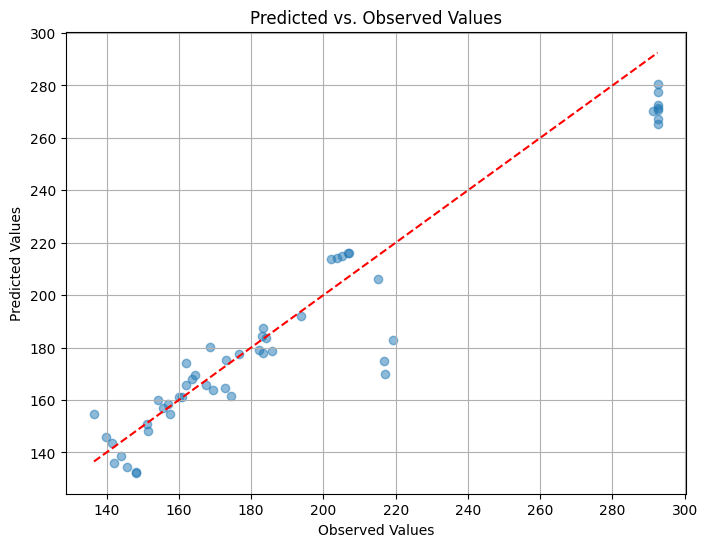

In [25]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, lasso_cv_predictions, alpha=0.5)
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Observed Values")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.show()